## Example Generic Data Reader

In this Example we use the generic lvl1b and lvl2 readers to read files in multiple formats (bufr, eps_native, netCDF). The datasets are from the Data Centre of the EUMETSAT-EO Portal (https://eoportal.eumetsat.int). Also simple plot scripts and simple masking is shown. For the multitemporal class, where you can read multiple orbit files, the process is only shown for bufr, but the classes for the other formats work the same.

## Level 1b

### First let's do the import, set the path to the test-data and initialise the objects. The path for to the bufr test-data is split so we can use it for the MultiTemporal class.

In [1]:
import os
import ascat.level1 as level1

test_data_path = os.path.join('..', 'tests','test-data', 'eumetsat', 'ASCAT_generic_reader_data')
bufr_file_path = os.path.join(test_data_path, 'bufr')
single_file_path_bufr = os.path.join(bufr_file_path, 'M02-ASCA-ASCSZR1B0200-NA-9.1-20100609013900.000000000Z-20130824233100-1280350.bfr')
single_file_path_eps = os.path.join(test_data_path, 'eps_nat', 'ASCA_SZR_1B_M02_20100609013900Z_20100609032058Z_R_O_20130824233100Z.nat')
single_file_path_nc = os.path.join(test_data_path, 'nc', 'W_XX-EUMETSAT-Darmstadt,SURFACE+SATELLITE,METOPA+ASCAT_C_EUMP_20100609013900_18872_eps_o_125_l1.nc')


single_reader_bufr = level1.AscatL1Image(single_file_path_bufr)
single_reader_eps = level1.AscatL1Image(single_file_path_eps)
single_reader_nc = level1.AscatL1Image(single_file_path_nc)
multi_reader = level1.AscatL1Bufr(bufr_file_path)

### Now let's read the single lvl1b orbit files-

In [2]:
generic_image_bufr = single_reader_bufr.read()
generic_image_eps = single_reader_eps.read()
generic_image_nc = single_reader_nc.read()

### Simple plot script for all three formats (should lead to the same result).

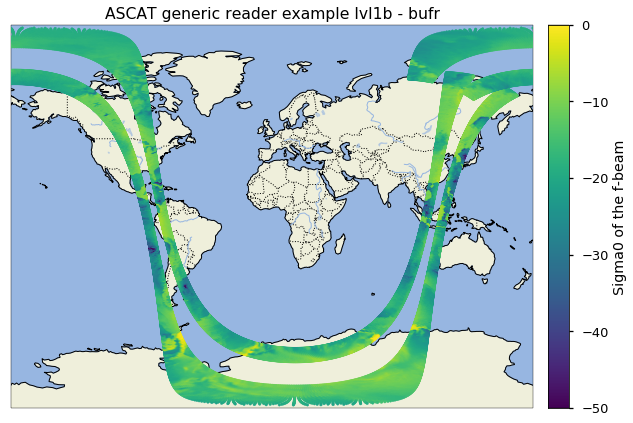

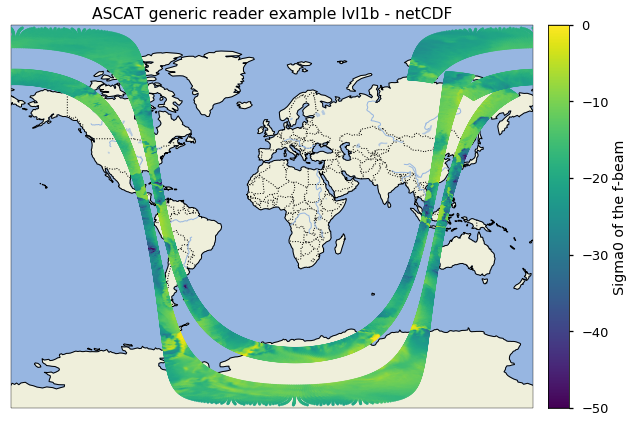

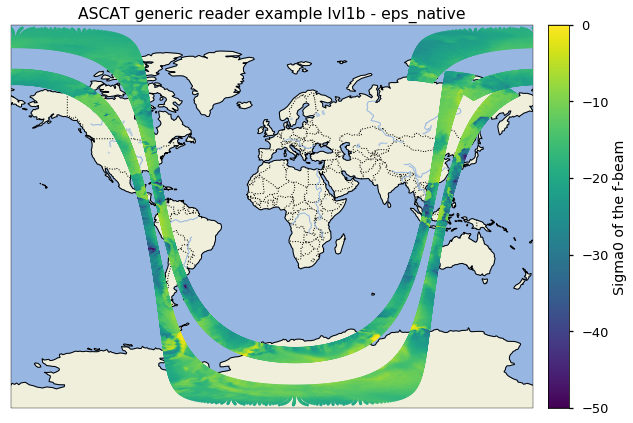

In [4]:
import cartopy
from cartopy.mpl.geoaxes import GeoAxes
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import AxesGrid

data_crs = cartopy.crs.PlateCarree()
proj = cartopy.crs.Miller()
axes_class = (GeoAxes, dict(map_projection=proj))

# image_list = [generic_image_bufr, generic_image_eps, generic_image_nc]
image_dict = {'bufr': generic_image_bufr, 'eps_native': generic_image_eps, 'netCDF': generic_image_nc}
for image in image_dict:
    lon = image_dict[image].lon
    lat = image_dict[image].lat
    data = image_dict[image].data['sigf']

    style_label = 'seaborn-talk'
    with plt.style.context(style_label):
        fig = plt.figure(figsize=(10, 8))
        ax = AxesGrid(fig, 111, axes_class=axes_class, nrows_ncols=(1, 1),
                      cbar_location='right', cbar_mode='single', cbar_pad=0.2,
                      cbar_size='4%', label_mode='')


        ax[0].set_title('ASCAT generic reader example lvl1b - ' + image)

        ax[0].add_feature(cartopy.feature.LAND)
        ax[0].add_feature(cartopy.feature.OCEAN)
        ax[0].add_feature(cartopy.feature.COASTLINE)
        ax[0].add_feature(cartopy.feature.BORDERS, linestyle=':')
        ax[0].add_feature(cartopy.feature.LAKES, alpha=0.5)
        ax[0].add_feature(cartopy.feature.RIVERS)

        ax[0].set_extent([-175, 175, -90, 90])

        sc = ax[0].scatter(lon, lat, c=data, s=7, marker='o', vmin=-50,
                           vmax=0, zorder=3, transform=data_crs)

        cbar = ax.cbar_axes[0].colorbar(sc)
        cbar.set_label_text('Sigma0 of the f-beam')

    plt.show()

### If we want to filter the data regarding one or more variables, we can create a simple mask. Let's try it for the land flag.

In [5]:
import numpy as np

data, meta, timestamp, lon, lat, time_var = generic_image_bufr

valid = np.ones(data[data.dtype.names[0]].shape, dtype=np.bool)
beams = ['f', 'm', 'a']

for b in beams:
    valid = (valid & (data['land_flag' + b] > 0.095))

data_masked = data[valid]
lon_masked = lon[valid]
lat_masked = lat[valid]

### Let's plot it to see the differences.

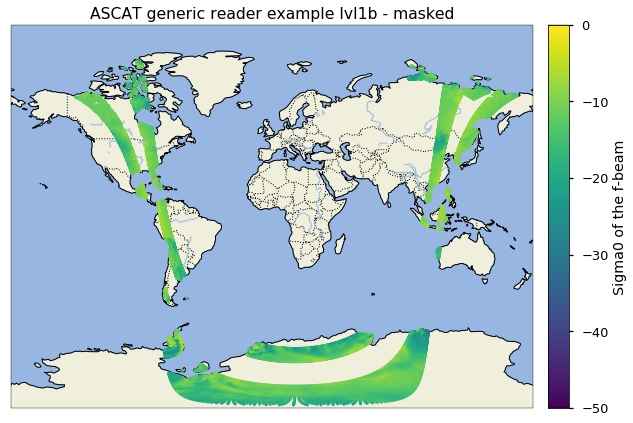

In [6]:
lon = lon_masked
lat = lat_masked
data = data_masked['sigf']

style_label = 'seaborn-talk'
with plt.style.context(style_label):
    fig = plt.figure(figsize=(10, 8))
    ax = AxesGrid(fig, 111, axes_class=axes_class, nrows_ncols=(1, 1),
                  cbar_location='right', cbar_mode='single', cbar_pad=0.2,
                  cbar_size='4%', label_mode='')


    ax[0].set_title('ASCAT generic reader example lvl1b - masked')

    ax[0].add_feature(cartopy.feature.LAND)
    ax[0].add_feature(cartopy.feature.OCEAN)
    ax[0].add_feature(cartopy.feature.COASTLINE)
    ax[0].add_feature(cartopy.feature.BORDERS, linestyle=':')
    ax[0].add_feature(cartopy.feature.LAKES, alpha=0.5)
    ax[0].add_feature(cartopy.feature.RIVERS)

    ax[0].set_extent([-175, 175, -90, 90])

    sc = ax[0].scatter(lon, lat, c=data, s=7, marker='o', vmin=-50,
                       vmax=0, zorder=3, transform=data_crs)

    cbar = ax.cbar_axes[0].colorbar(sc)
    cbar.set_label_text('Sigma0 of the f-beam')

plt.show()

### Let's now use the multitemporal AscatL1Bufr class to read a file from the folder by giving it a datetime object. As already said, the usage of AscatL1Eps and AscatL1Nc is exactly the same.

In [7]:
from datetime import datetime

generic_image_multi = multi_reader.read(datetime(2010, 6, 9, 1, 39))

## Level 2

### Same thing as for lvl1b: import, path to data files, creation of objects

In [8]:
import os
import ascat.level2 as level2

test_data_path = os.path.join('..', 'tests','test-data', 'eumetsat', 'ASCAT_generic_reader_data')
bufr_file_path = os.path.join(test_data_path, 'bufr')
single_file_path_bufr = os.path.join(bufr_file_path, 'M01-ASCA-ASCSMO02-NA-5.0-20180612035700.000000000Z-20180612044530-1281300.bfr')
single_file_path_eps = os.path.join(test_data_path, 'eps_nat', 'ASCA_SMO_02_M01_20180612035700Z_20180612053856Z_N_O_20180612044530Z.nat')
single_file_path_nc = os.path.join(test_data_path, 'nc', 'W_XX-EUMETSAT-Darmstadt,SURFACE+SATELLITE,METOPB+ASCAT_C_EUMP_20180612035700_29742_eps_o_250_ssm_l2.nc')


single_reader_bufr = level2.AscatL2Image(single_file_path_bufr)
single_reader_eps = level2.AscatL2Image(single_file_path_eps)
single_reader_nc = level2.AscatL2Image(single_file_path_nc)
multi_reader = level2.AscatL2Bufr(bufr_file_path, eo_portal=True)

### Now let's read the single lvl2 orbit files

In [9]:
generic_image_bufr = single_reader_bufr.read()
generic_image_eps = single_reader_eps.read()
generic_image_nc = single_reader_nc.read()

### Plot it:

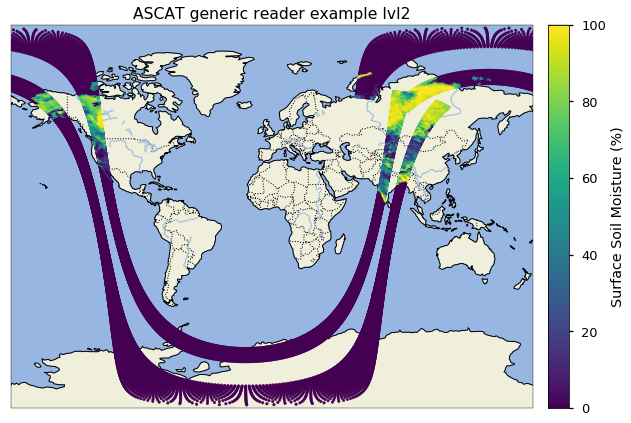

In [10]:
import cartopy
from cartopy.mpl.geoaxes import GeoAxes
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import AxesGrid

data_crs = cartopy.crs.PlateCarree()
proj = cartopy.crs.Miller()
axes_class = (GeoAxes, dict(map_projection=proj))

lon = generic_image_bufr.lon
lat = generic_image_bufr.lat
data = generic_image_bufr.data['sm']

style_label = 'seaborn-talk'
with plt.style.context(style_label):
    fig = plt.figure(figsize=(10, 8))
    ax = AxesGrid(fig, 111, axes_class=axes_class, nrows_ncols=(1, 1),
                  cbar_location='right', cbar_mode='single', cbar_pad=0.2,
                  cbar_size='4%', label_mode='')


    ax[0].set_title('ASCAT generic reader example lvl2')

    ax[0].add_feature(cartopy.feature.LAND)
    ax[0].add_feature(cartopy.feature.OCEAN)
    ax[0].add_feature(cartopy.feature.COASTLINE)
    ax[0].add_feature(cartopy.feature.BORDERS, linestyle=':')
    ax[0].add_feature(cartopy.feature.LAKES, alpha=0.5)
    ax[0].add_feature(cartopy.feature.RIVERS)

    ax[0].set_extent([-175, 175, -90, 90])

    sc = ax[0].scatter(lon, lat, c=data, s=7, marker='o', vmin=0,
                       vmax=100, zorder=3, transform=data_crs)

    cbar = ax.cbar_axes[0].colorbar(sc)
    cbar.set_label_text('Surface Soil Moisture (%)')

plt.show()

### Let's now use the multitemporal AscatL2Bufr class to read a file from the folder by giving it a datetime object.

In [11]:
from datetime import datetime

generic_image_multi = multi_reader.read(datetime(2018, 6, 12, 3, 57))